Activate conda environment - transferlearningDemmo

In [ ]:
! pip install tensorflow==2.0 #(downgrade from latest version 2.1 to 2.0 for error free implementation ) 
# installed with python3.6 bcoz tensorflow2 (Python 3.5–3.7) and keras (Python 2.7-3.6)
# its tensorflow version 2
# https://www.tensorflow.org/install

In [ ]:
! pip install keras

# Keras transfer learning documentation - https://keras.io/applications/

In [4]:
!pip install matplotlib

In [15]:
! pip install pillow

In [1]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '5-celebrity-faces-dataset/data/train'
valid_path = '5-celebrity-faces-dataset/data/val'

In [4]:
valid_path

'5-celebrity-faces-dataset/data/val'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


#following the RESNET archietcture
#vgg = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of classes
folders = glob('5-celebrity-faces-dataset/data/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Generating more images for training the model..

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Rescaling the test images as train images..
test_datagen = ImageDataGenerator(rescale = 1./255)



In [13]:
# Building the training and testing sets..

training_set = train_datagen.flow_from_directory('5-celebrity-faces-dataset/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('5-celebrity-faces-dataset/data/val',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [14]:
# fit the model..

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
5/5 [==============================] - 36s 7s/step - loss: 2.7552 - accuracy: 0.2043 - val_loss: 2.2692 - val_accuracy: 0.2800
Epoch 2/25
5/5 [==============================] - 39s 8s/step - loss: 1.7088 - accuracy: 0.3871 - val_loss: 1.3857 - val_accuracy: 0.4400
Epoch 3/25
5/5 [==============================] - 40s 8s/step - loss: 0.7878 - accuracy: 0.7312 - val_loss: 0.9938 - val_accuracy: 0.6800
Epoch 4/25
5/5 [==============================] - 43s 9s/step - loss: 0.4209 - accuracy: 0.8280 - val_loss: 0.7073 - val_accuracy: 0.8000
Epoch 5/25
5/5 [==============================] - 70s 14s/step - loss: 0.2099 - accuracy: 0.9785 - val_loss: 0.3460 - val_accuracy: 0.6800
Epoch 6/25
5/5 [==============================] - 55s 11s/step - loss: 0.1492 - accuracy: 0.9892 - val_loss: 0.7762 - val_accuracy: 0.8400
Epoch 7/25
5/5 [==============================] - 59s 12s/step - loss: 0.0915 - accuracy: 1.0000 - val_loss: 0.4792 - val_accuracy: 0.7600
Epoch 8/25
5/5 [===============

# NOT BAD!!! - 96% accuracy without much efforts

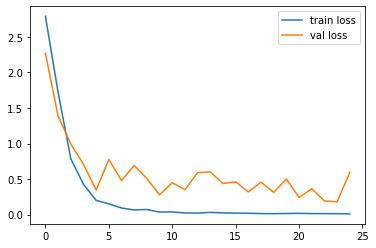

<Figure size 432x288 with 0 Axes>

In [15]:
# loss..

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


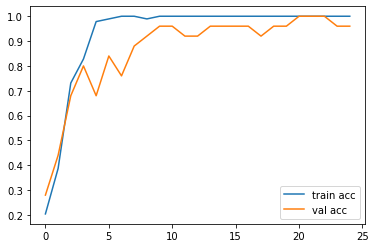

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies..

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [17]:
#import tensorflow as tf

#from keras.models import load_model

model.save('celebrity_faces_transfered_model.h5')

# Validating the new model..

In [18]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from IPython.display import Image, display

In [19]:
image_list = ['5-celebrity-faces-dataset/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnemmysperformancewatchnowjpg.jpg',
              '5-celebrity-faces-dataset/data/val/ben_afflek/httpafilesbiographycomimageuploadcfillcssrgbdprgfacehqwMTENDgMDUODczNDcNTcjpg.jpg',
              '5-celebrity-faces-dataset/data/val/jerry_seinfeld/httpblognjcomentertainmentimpactcelebritiesmediumjerrybjpg.jpg',
              '5-celebrity-faces-dataset/data/val/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg',
              '5-celebrity-faces-dataset/data/val/mindy_kaling/httpcdnpastemagazinecomwwwarticlesmindykalingndbookjpg.jpg']

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
original name: elton_john
99.99998807907104 mindy_kaling


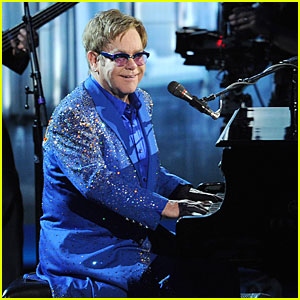

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
original name: ben_afflek
99.51813817024231 ben_afflek


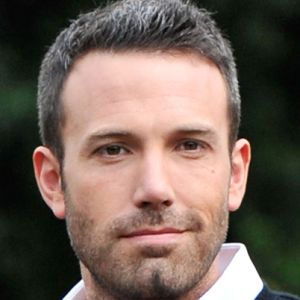

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
original name: jerry_seinfeld
100.0 jerry_seinfeld


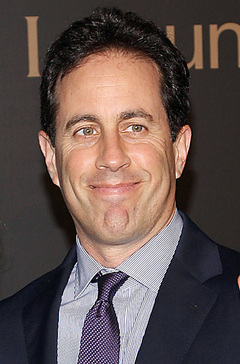

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
original name: madonna
100.0 madonna


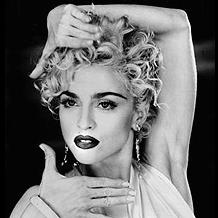

['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling']
original name: mindy_kaling
100.0 mindy_kaling


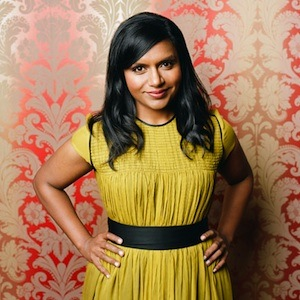

In [20]:
labels = ['ben_afflek',
                 'elton_john',
                 'jerry_seinfeld',
                 'madonna',
                 'mindy_kaling'] 


for image_name in image_list:
    img = image.load_img(image_name, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_data = preprocess_input(x)
    classes = model.predict(img_data)
    result = np.squeeze(classes)
    result_indices = np.argmax(result)
    
    print(labels)
    print(f'original name: {image_name.split("/")[3]}')
    print(result[result_indices]*100, labels[result_indices])
    display(Image(filename=image_name))
    
    '''print(f'original name: {image_name.split("/")[3]}')
    print(f'{labels}')
    '''
    

# Awesome Predictions!!

## To be continue with other state of the art models..